<a href="https://colab.research.google.com/github/dla9944/God_damn_deeplearning/blob/master/Seq2Seq_sample_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt


In [5]:
!pip install Seq2Seq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
vocab_size = 256
x_ = list(map(ord, 'hello'))
y_ = list(map(ord, 'hola'))
x = torch.LongTensor(x_)
y = torch.LongTensor(y_)

In [16]:
class Seq2Seq(nn.Module):
   def __init__(self, vocab_size, hidden_size):
       super(Seq2Seq, self).__init__()
       self.n_layers = 1
       self.hidden_size = hidden_size
       self.embedding = nn.Embedding(vocab_size, hidden_size)
       self.encoder = nn.GRU(hidden_size, hidden_size)
       self.decoder = nn.GRU(hidden_size, hidden_size)
       self.project = nn.Linear(hidden_size, vocab_size)

   def forward(self, inputs, targets):
       initial_state = self._init_state()
       embedding = self.embedding(inputs).unsqueeze(1)
       encoder_output, encoder_state = self.encoder(embedding, initial_state)
       decoder_state = encoder_state
       decoder_input = torch.LongTensor([0])

       outputs = []
       for i in range(targets.size()[0]):
          decoder_input = self.embedding(decoder_input).unsqueeze(1)
          decoder_output, decoder_state = self.decoder(decoder_input, decoder_state)

          projection = self.project(decoder_output)
          outputs.append(projection)
          decoder_input = torch.LongTensor([targets[i]])
       outputs = torch.stack(outputs).squeeze()
       return outputs

   def _init_state(self, batch_size =1):
       weight = next(self.parameters()).data
       return weight.new(self.n_layers, batch_size, self.hidden_size).zero_() 

In [17]:
seq2seq = Seq2Seq(vocab_size, 16)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(seq2seq.parameters(), lr=0.0001)


 반복 : 0 오차 : 5.676328659057617
['<', '¬', 'p', 'ç']

 반복 : 100 오차 : 5.410270690917969
['<', 'p', 'p', 'ç']

 반복 : 200 오차 : 5.112542629241943
[')', 'p', 'p', 'a']

 반복 : 300 오차 : 4.754245758056641
['h', 'p', 'l', 'a']

 반복 : 400 오차 : 4.329888820648193
['h', 'l', 'l', 'a']

 반복 : 500 오차 : 3.860001802444458
['h', 'l', 'l', 'a']

 반복 : 600 오차 : 3.376340389251709
['h', 'l', 'l', 'a']

 반복 : 700 오차 : 2.912646770477295
['h', 'l', 'l', 'a']

 반복 : 800 오차 : 2.5142595767974854
['h', 'l', 'l', 'a']

 반복 : 900 오차 : 2.18937611579895
['h', 'l', 'l', 'a']


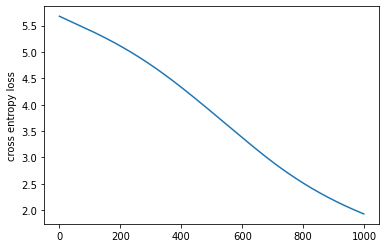

In [18]:
log = []
for i in range(1000):
    prediction = seq2seq(x,y)
    loss = criterion(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_val = loss.data
    log.append(loss_val)
    if i % 100 == 0:
       print('\n 반복 : %d 오차 : %s' % (i, loss_val.item()))
       _, top1 = prediction.data.topk(1,1)
       print([chr(c) for c in top1.squeeze().numpy().tolist()])

plt.plot(log)
plt.ylabel('cross entropy loss')
plt.show()

In [ ]:
# EPOCH가 턱없이 작기 때문에 번역 정확도 하락